### Pareto Distribution Sampling

PDF: $ f(x) = \frac{\alpha x_{min}^{\alpha}}{x^{\alpha+1}} $



CDF = $ F(x) = 1 - (\frac{x_{min}}{x})^\alpha $

In the following, 100,000 uniform random numbers on [0, 1] are transformed to a Pareto with a CDF slope of 2.8. The cumulative frequency of samples X >= x is plotted on a log-log scale. A linear regression is calculated on the cumulative frequency of samples in log-log scale, and the slope of the the regression is found to match that of the CDF.

In [1]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

from saturation.distributions import *
from saturation.simulation import *

In [2]:
slope = 2
dist = ParetoProbabilityDistribution(cdf_slope=slope, x_min=2.5, x_max=2500)

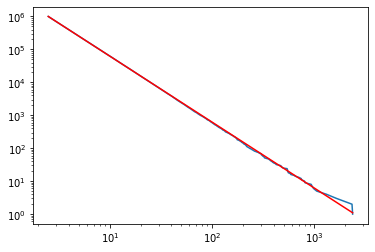

In [3]:
# Plot the CDF
n_samples = 1000000
y = np.arange(n_samples, 0, -1)

urands = np.random.rand(n_samples)
x = [x.radius for x in itertools.islice(get_craters(dist, 10000), n_samples)]
x = sorted(x)

plt.plot(x, y)

# Regression line
ln_x = np.reshape(np.log(x), newshape=(len(x), 1))
ln_y = np.log(y)

reg = LinearRegression().fit(ln_x, ln_y)
line_y = [np.exp(reg.intercept_ + reg.coef_ * np.log(x)) for x in x]
plt.plot(x, line_y, 'r')

plt.xscale('log')
plt.yscale('log')

plt.show()

In [ ]:
# Regression coefficient - close to the slope of the CDF = -2
reg.coef_[0]